# Results Analysis: SLM vs LLM Performance

Comparing fine-tuned Small Language Models (GPT-2, GPT-2 Medium, GPT-Neo 125M) against Large Language Models (GPT-3.5-turbo, GPT-4, GPT-5) on grammar correction and text simplification tasks.

In [36]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

## Load Results Data

In [37]:
def load_metrics(path):
    with open(path) as f:
        return json.load(f)

slm_grammar = {
    'GPT-2': load_metrics('hpc_results_backup/grammar_gpt2_jfleg_test_metrics.json'),
    'GPT-2 Medium': load_metrics('hpc_results_backup/grammar_gpt2-medium_jfleg_test_metrics.json'),
    'GPT-Neo 125M': load_metrics('hpc_results_backup/grammar_EleutherAI_gpt-neo-125M_jfleg_test_metrics.json'),
}

llm_grammar = {
    'GPT-3.5-turbo': load_metrics('LLM_evaluation/results/grammar_gpt_3.5_turbo_jfleg_test_metrics.json'),
    'GPT-4': load_metrics('LLM_evaluation/results/grammar_gpt_4_jfleg_test_metrics.json'),
    'GPT-5': load_metrics('LLM_evaluation/results/grammar_gpt_5_jfleg_test_metrics.json'),
}

slm_readability = {
    'GPT-2': load_metrics('hpc_results_backup/readability_gpt2_asset_test_metrics.json'),
    'GPT-Neo 125M': load_metrics('hpc_results_backup/readability_EleutherAI_gpt-neo-125M_asset_test_metrics.json'),
}

llm_readability = {
    'GPT-3.5-turbo': load_metrics('LLM_evaluation/results/readability_gpt_3.5_turbo_asset_test_metrics.json'),
    'GPT-4': load_metrics('LLM_evaluation/results/readability_gpt_4_asset_test_metrics.json'),
    'GPT-5': load_metrics('LLM_evaluation/results/readability_gpt_5_asset_test_metrics.json'),
}

## Grammar Correction Results (JFLEG Test Set)

C:\Users\antho\AppData\Local\Temp\ipykernel_23044\2348451033.py:20: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  ax.legend(['SLMs (Fine-tuned)', 'LLMs (Zero-shot)'],


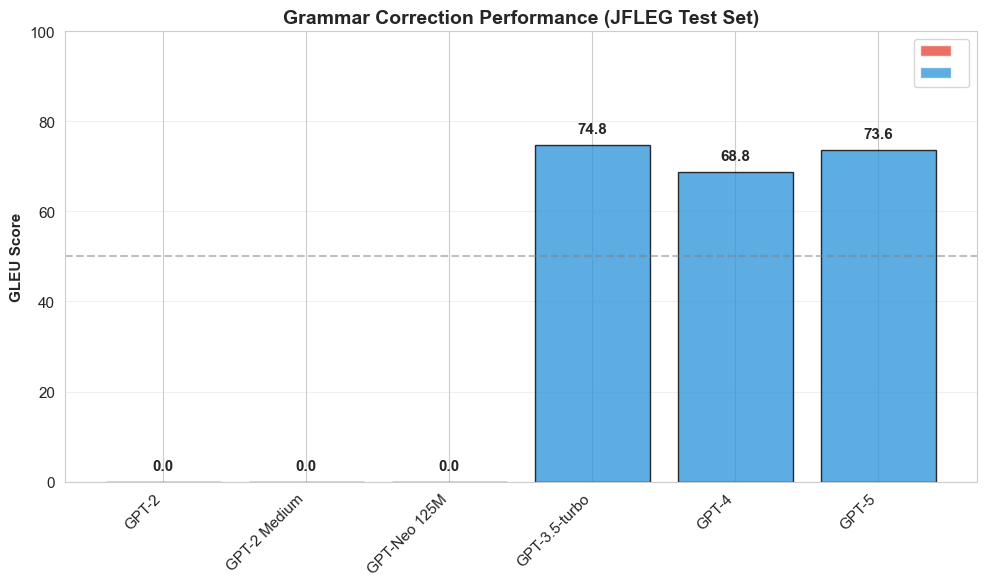

In [38]:
all_grammar = {**slm_grammar, **llm_grammar}
models = list(all_grammar.keys())
gleu_scores = [all_grammar[m]['gleu_score'] for m in models]

fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#e74c3c']*3 + ['#3498db']*3
bars = ax.bar(models, gleu_scores, color=colors, alpha=0.8, edgecolor='black')

ax.axhline(y=50, color='gray', linestyle='--', alpha=0.5, label='50% baseline')
ax.set_ylabel('GLEU Score', fontweight='bold')
ax.set_title('Grammar Correction Performance (JFLEG Test Set)', fontweight='bold', fontsize=14)
ax.set_ylim(0, 100)
ax.grid(axis='y', alpha=0.3)

for i, (bar, score) in enumerate(zip(bars, gleu_scores)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 2,
            f'{score:.1f}', ha='center', va='bottom', fontweight='bold')

ax.legend(['SLMs (Fine-tuned)', 'LLMs (Zero-shot)'], 
          handles=[plt.Rectangle((0,0),1,1, fc='#e74c3c', alpha=0.8),
                   plt.Rectangle((0,0),1,1, fc='#3498db', alpha=0.8)])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

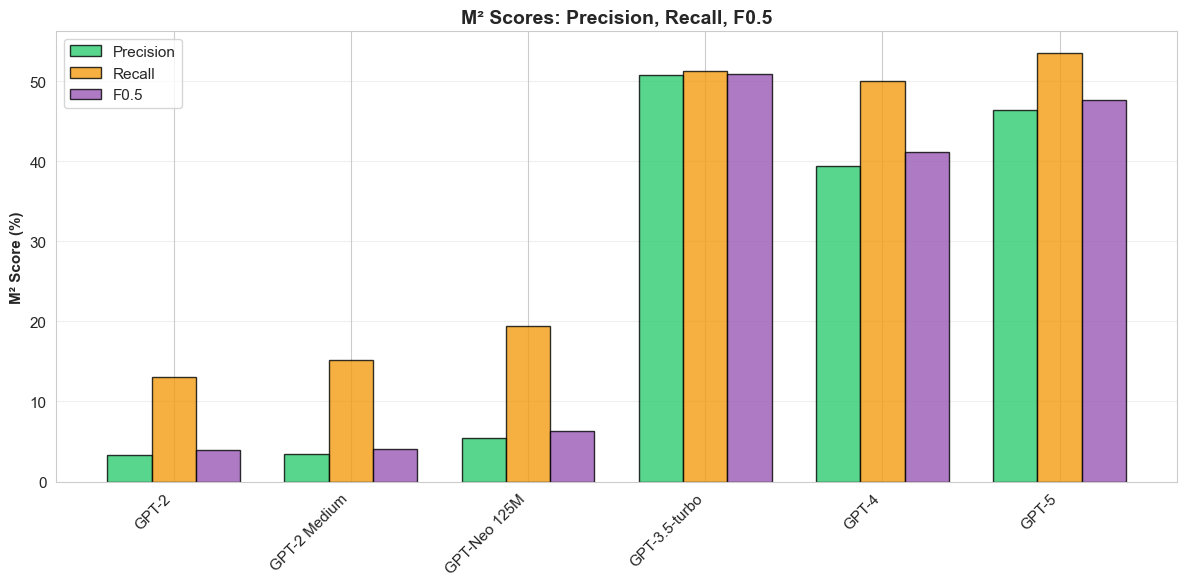

In [39]:
m2_data = {
    'Model': models,
    'Precision': [all_grammar[m]['m2_precision'] for m in models],
    'Recall': [all_grammar[m]['m2_recall'] for m in models],
    'F0.5': [all_grammar[m]['m2_f0.5'] for m in models]
}

df_m2 = pd.DataFrame(m2_data)
df_m2_melted = df_m2.melt(id_vars='Model', var_name='Metric', value_name='Score')

fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(models))
width = 0.25

metrics = ['Precision', 'Recall', 'F0.5']
colors_m2 = ['#2ecc71', '#f39c12', '#9b59b6']

for i, metric in enumerate(metrics):
    values = df_m2[metric].values
    ax.bar(x + i*width, values, width, label=metric, color=colors_m2[i], alpha=0.8, edgecolor='black')

ax.set_ylabel('M² Score (%)', fontweight='bold')
ax.set_title('M² Scores: Precision, Recall, F0.5', fontweight='bold', fontsize=14)
ax.set_xticks(x + width)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Text Simplification Results (ASSET Test Set)

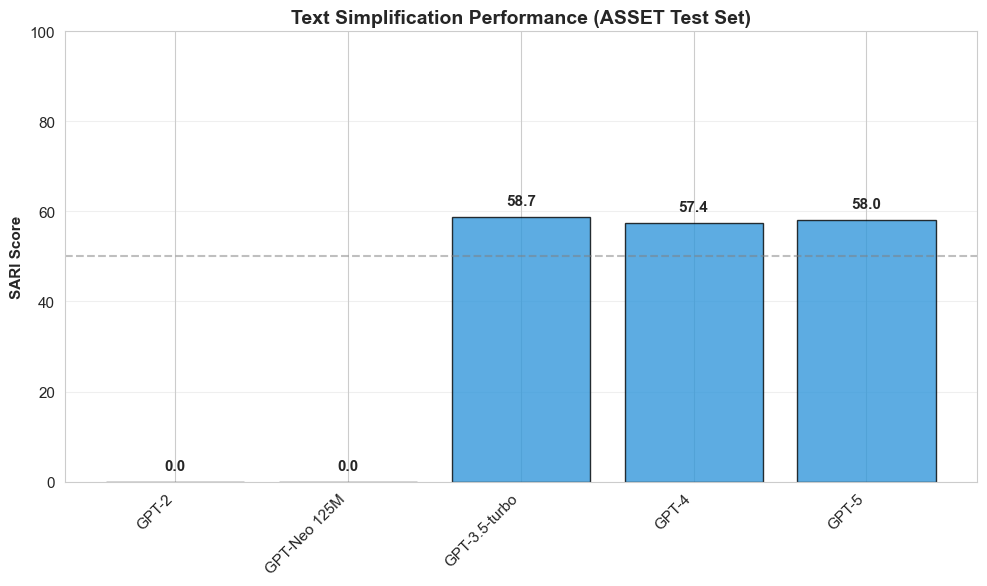

In [40]:
all_readability = {**slm_readability, **llm_readability}
read_models = list(all_readability.keys())
sari_scores = [all_readability[m]['sari_score'] for m in read_models]

fig, ax = plt.subplots(figsize=(10, 6))
colors_read = ['#e74c3c']*2 + ['#3498db']*3
bars = ax.bar(read_models, sari_scores, color=colors_read, alpha=0.8, edgecolor='black')

ax.axhline(y=50, color='gray', linestyle='--', alpha=0.5)
ax.set_ylabel('SARI Score', fontweight='bold')
ax.set_title('Text Simplification Performance (ASSET Test Set)', fontweight='bold', fontsize=14)
ax.set_ylim(0, 100)
ax.grid(axis='y', alpha=0.3)

for bar, score in zip(bars, sari_scores):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 2,
            f'{score:.1f}', ha='center', va='bottom', fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

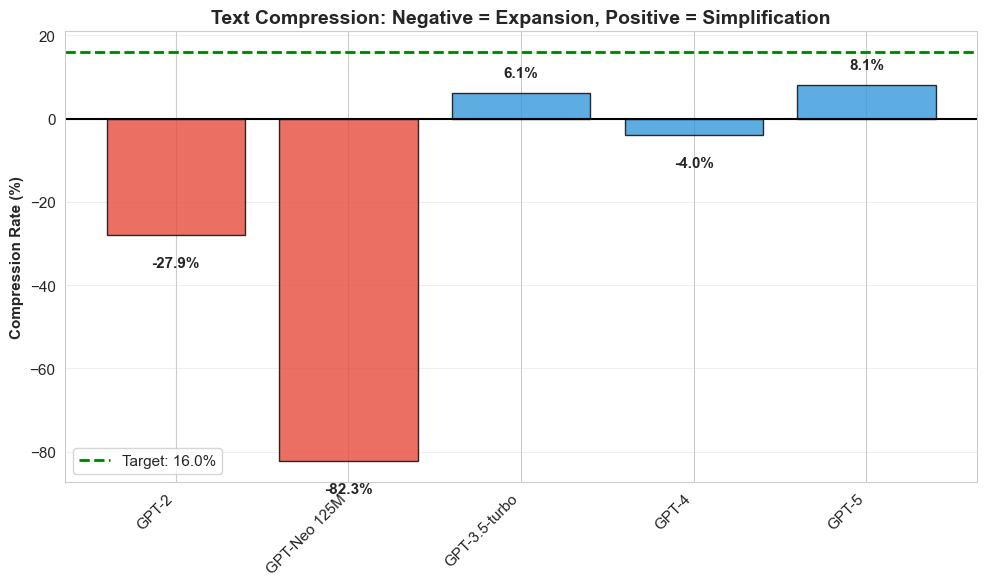

In [41]:
compression_rates = [all_readability[m]['prediction_compression_rate'] for m in read_models]
target_compression = 16.04

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(read_models, compression_rates, color=colors_read, alpha=0.8, edgecolor='black')

ax.axhline(y=0, color='black', linewidth=1.5)
ax.axhline(y=target_compression, color='green', linestyle='--', linewidth=2, label=f'Target: {target_compression:.1f}%')
ax.set_ylabel('Compression Rate (%)', fontweight='bold')
ax.set_title('Text Compression: Negative = Expansion, Positive = Simplification', fontweight='bold', fontsize=14)
ax.grid(axis='y', alpha=0.3)
ax.legend()

for bar, rate in zip(bars, compression_rates):
    height = bar.get_height()
    y_pos = height + 3 if height > 0 else height - 5
    ax.text(bar.get_x() + bar.get_width()/2., y_pos,
            f'{rate:.1f}%', ha='center', va='bottom' if height > 0 else 'top', fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

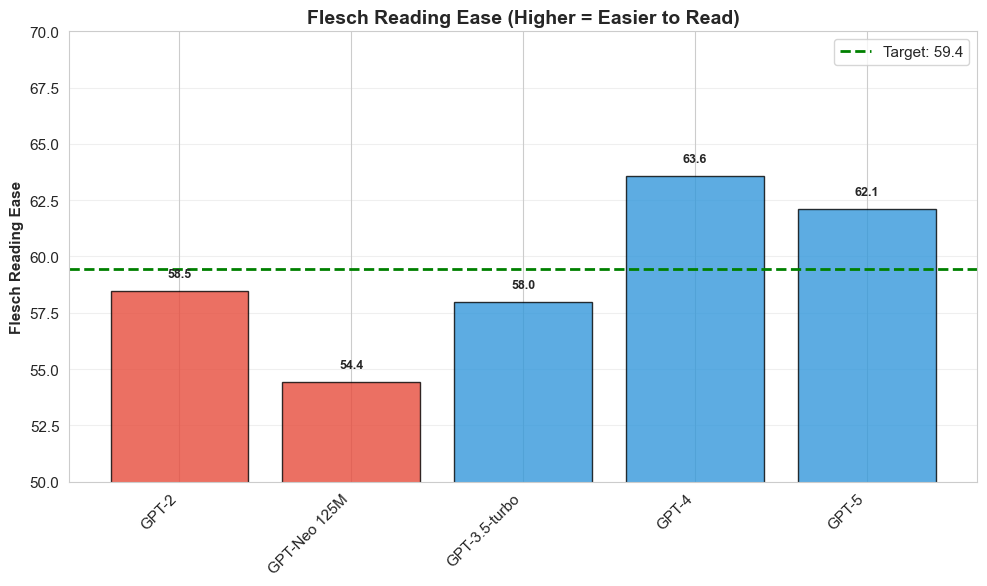

In [42]:
flesch_scores = [all_readability[m]['prediction_flesch_reading_ease'] for m in read_models]
flesch_target = all_readability['GPT-5']['target_flesch_reading_ease']

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(read_models, flesch_scores, color=colors_read, alpha=0.8, edgecolor='black')

ax.axhline(y=flesch_target, color='green', linestyle='--', linewidth=2, label=f'Target: {flesch_target:.1f}')
ax.set_ylabel('Flesch Reading Ease', fontweight='bold')
ax.set_title('Flesch Reading Ease (Higher = Easier to Read)', fontweight='bold', fontsize=14)
ax.set_ylim(50, 70)
ax.grid(axis='y', alpha=0.3)
ax.legend()

for bar, score in zip(bars, flesch_scores):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{score:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

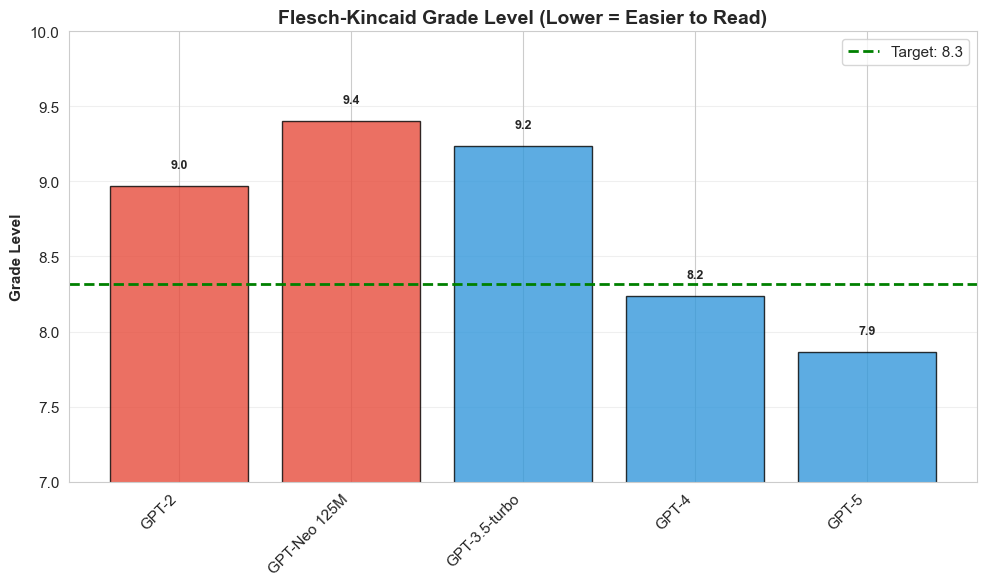

In [43]:
fkgl_scores = [all_readability[m]['prediction_flesch_kincaid_grade_level'] for m in read_models]
fkgl_target = all_readability['GPT-5']['target_flesch_kincaid_grade_level']

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(read_models, fkgl_scores, color=colors_read, alpha=0.8, edgecolor='black')

ax.axhline(y=fkgl_target, color='green', linestyle='--', linewidth=2, label=f'Target: {fkgl_target:.1f}')
ax.set_ylabel('Grade Level', fontweight='bold')
ax.set_title('Flesch-Kincaid Grade Level (Lower = Easier to Read)', fontweight='bold', fontsize=14)
ax.set_ylim(7, 10)
ax.grid(axis='y', alpha=0.3)
ax.legend()

for bar, score in zip(bars, fkgl_scores):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{score:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Comprehensive Comparison

In [44]:
grammar_summary = pd.DataFrame({
    'Model': models,
    'GLEU': [all_grammar[m]['gleu_score'] for m in models],
    'M² F0.5': [all_grammar[m]['m2_f0.5'] for m in models],
    'M² Precision': [all_grammar[m]['m2_precision'] for m in models],
    'M² Recall': [all_grammar[m]['m2_recall'] for m in models]
})

print("Grammar Correction Summary (JFLEG Test):")
print(grammar_summary.to_string(index=False))
print("\n" + "="*80 + "\n")

readability_summary = pd.DataFrame({
    'Model': read_models,
    'SARI': [all_readability[m]['sari_score'] for m in read_models],
    'Compression (%)': [all_readability[m]['prediction_compression_rate'] for m in read_models],
    'Flesch RE': [all_readability[m]['prediction_flesch_reading_ease'] for m in read_models],
    'FK Grade': [all_readability[m]['prediction_flesch_kincaid_grade_level'] for m in read_models]
})

print("Text Simplification Summary (ASSET Test):")
print(readability_summary.to_string(index=False))

Grammar Correction Summary (JFLEG Test):
        Model      GLEU   M² F0.5  M² Precision  M² Recall
        GPT-2  0.000000  3.971051      3.381810  13.103757
 GPT-2 Medium  0.000000  4.114477      3.480493  15.161002
 GPT-Neo 125M  0.000000  6.322275      5.411147  19.364937
GPT-3.5-turbo 74.792222 50.914418     50.819672  51.296959
        GPT-4 68.837959 41.090347     39.344840  49.955277
        GPT-5 73.640961 47.636103     46.359411  53.533095


Text Simplification Summary (ASSET Test):
        Model      SARI  Compression (%)  Flesch RE  FK Grade
        GPT-2  0.000000       -27.905004  58.476004  8.967675
 GPT-Neo 125M  0.000000       -82.301385  54.409877  9.404584
GPT-3.5-turbo 58.742799         6.149279  57.958633  9.235339
        GPT-4 57.444194        -4.042974  63.571430  8.234775
        GPT-5 58.048750         8.142494  62.102206  7.861283


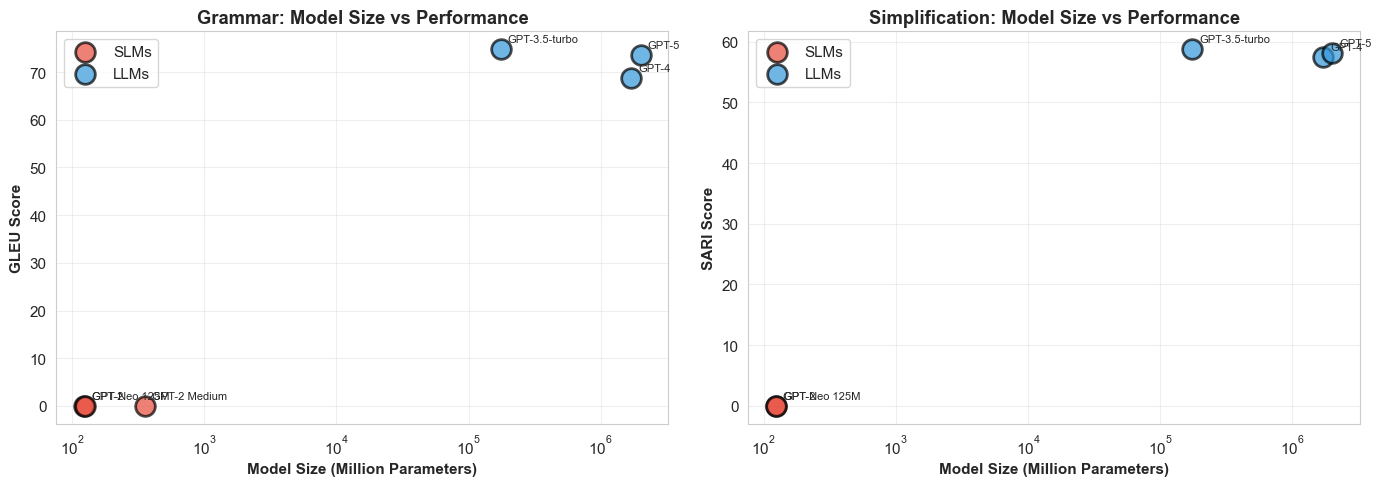

In [45]:
model_sizes = {
    'GPT-2': 124,
    'GPT-2 Medium': 355,
    'GPT-Neo 125M': 125,
    'GPT-3.5-turbo': 175000,
    'GPT-4': 1700000,
    'GPT-5': 2000000
}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

grammar_models = [m for m in models if m in model_sizes]
sizes = [model_sizes[m] for m in grammar_models]
gleu = [all_grammar[m]['gleu_score'] for m in grammar_models]

ax1.scatter(sizes[:3], gleu[:3], s=200, c='#e74c3c', alpha=0.7, edgecolors='black', linewidths=2, label='SLMs')
ax1.scatter(sizes[3:], gleu[3:], s=200, c='#3498db', alpha=0.7, edgecolors='black', linewidths=2, label='LLMs')
ax1.set_xscale('log')
ax1.set_xlabel('Model Size (Million Parameters)', fontweight='bold')
ax1.set_ylabel('GLEU Score', fontweight='bold')
ax1.set_title('Grammar: Model Size vs Performance', fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

for i, model in enumerate(grammar_models):
    ax1.annotate(model, (sizes[i], gleu[i]), xytext=(5, 5), 
                textcoords='offset points', fontsize=8)

read_model_sizes = [model_sizes[m] for m in read_models]
sari = [all_readability[m]['sari_score'] for m in read_models]

ax2.scatter(read_model_sizes[:2], sari[:2], s=200, c='#e74c3c', alpha=0.7, edgecolors='black', linewidths=2, label='SLMs')
ax2.scatter(read_model_sizes[2:], sari[2:], s=200, c='#3498db', alpha=0.7, edgecolors='black', linewidths=2, label='LLMs')
ax2.set_xscale('log')
ax2.set_xlabel('Model Size (Million Parameters)', fontweight='bold')
ax2.set_ylabel('SARI Score', fontweight='bold')
ax2.set_title('Simplification: Model Size vs Performance', fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()

for i, model in enumerate(read_models):
    ax2.annotate(model, (read_model_sizes[i], sari[i]), xytext=(5, 5),
                textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()

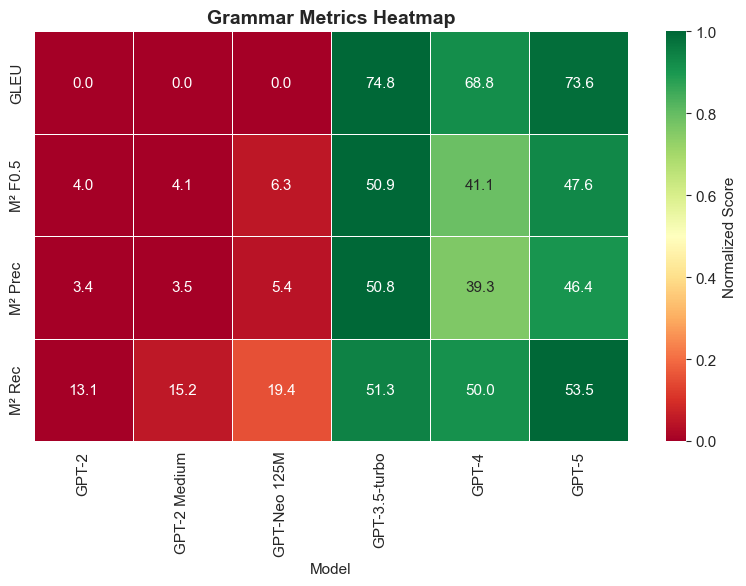

In [46]:
heatmap_data = []
for model in models:
    row = {
        'Model': model,
        'GLEU': all_grammar[model]['gleu_score'],
        'M² F0.5': all_grammar[model]['m2_f0.5'],
        'M² Prec': all_grammar[model]['m2_precision'],
        'M² Rec': all_grammar[model]['m2_recall']
    }
    heatmap_data.append(row)

df_heat = pd.DataFrame(heatmap_data)
df_heat_norm = df_heat.set_index('Model')
df_heat_norm = (df_heat_norm - df_heat_norm.min()) / (df_heat_norm.max() - df_heat_norm.min())

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df_heat_norm.T, annot=df_heat.set_index('Model').T, fmt='.1f', 
            cmap='RdYlGn', cbar_kws={'label': 'Normalized Score'}, 
            linewidths=0.5, ax=ax)
ax.set_title('Grammar Metrics Heatmap', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

## Key Findings Summary

In [47]:
print("="*80)
print("GRAMMAR CORRECTION (JFLEG Test - 748 examples)")
print("="*80)
print(f"\nBest GLEU: GPT-3.5-turbo ({all_grammar['GPT-3.5-turbo']['gleu_score']:.2f})")
print(f"Best M² F0.5: GPT-3.5-turbo ({all_grammar['GPT-3.5-turbo']['m2_f0.5']:.2f}%)")
print(f"\nSLM Average M² F0.5: {np.mean([all_grammar[m]['m2_f0.5'] for m in slm_grammar.keys()]):.2f}%")
print(f"LLM Average M² F0.5: {np.mean([all_grammar[m]['m2_f0.5'] for m in llm_grammar.keys()]):.2f}%")
print(f"Performance Gap: {np.mean([all_grammar[m]['m2_f0.5'] for m in llm_grammar.keys()]) - np.mean([all_grammar[m]['m2_f0.5'] for m in slm_grammar.keys()]):.2f}%")

print("\n" + "="*80)
print("TEXT SIMPLIFICATION (ASSET Test - 359 examples)")
print("="*80)
print(f"\nBest SARI: GPT-3.5-turbo ({all_readability['GPT-3.5-turbo']['sari_score']:.2f})")
print(f"Best Compression: GPT-5 ({all_readability['GPT-5']['prediction_compression_rate']:.2f}%)")
print(f"\nSLM Issue: Models expand text instead of simplifying")
print(f"  GPT-2: {all_readability['GPT-2']['prediction_compression_rate']:.2f}% compression")
print(f"  GPT-Neo: {all_readability['GPT-Neo 125M']['prediction_compression_rate']:.2f}% compression")
print(f"\nTarget compression: 16.04%")
print("="*80)

GRAMMAR CORRECTION (JFLEG Test - 748 examples)

Best GLEU: GPT-3.5-turbo (74.79)
Best M² F0.5: GPT-3.5-turbo (50.91%)

SLM Average M² F0.5: 4.80%
LLM Average M² F0.5: 46.55%
Performance Gap: 41.74%

TEXT SIMPLIFICATION (ASSET Test - 359 examples)

Best SARI: GPT-3.5-turbo (58.74)
Best Compression: GPT-5 (8.14%)

SLM Issue: Models expand text instead of simplifying
  GPT-2: -27.91% compression
  GPT-Neo: -82.30% compression

Target compression: 16.04%
